Toxic Comment Classifier Using multiple Algorithms to classify incoming data into 
1. Toxic
2. Severe Toxic
3. Obscene
4. Threat
5. Insult And
6. Identity Hate

## Import relevant libraris and load the data

In [1]:
## Installing nltk (Natural Language processing Tool Kit)
#!pip install nltk

In [2]:
# Import relevant packages
# pyplot is required for plotting data into visual format

import matplotlib.pyplot as pyplotter
# (Natural Language processing Tool Kit)
import nltk
# numpy is used for handling arrays and shapes for fast computing
import numpy as np
# Regular expressions is used for cleaning
import re 
# Pandas has data structures and analysis tools
import pandas as pd
# string functions along with regular expressions used to manipulate comments
import string
# seaborn for data visualization
import seaborn as sns
# Remove useless words
from nltk.corpus import stopwords  
# Convert words to base form; aggressive
from nltk.stem.lancaster import LancasterStemmer  

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [3]:
# In case there is a bug, just download stopwords again.
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qazi_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Stopwords are a list of 'useless' words. Set dictionary to english
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Load training data from train.csv

In [5]:
allComments = pd.read_csv('train.csv')
allComments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
##Choose Toxic and comment column only as per instruction

In [7]:
data = allComments.loc[:,['id','comment_text','toxic']]
data.rename(columns={'comment_text': 'comment', 'toxic': 'class'}, inplace=True)
data.head()

,id,comment,class
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


Entries with all 0 under the 6 categories are neutral and considered as non-toxic.

In [8]:
columns_to_change = ['class']
# replace 0 values with 'NT' in the 'column_name' column
data[columns_to_change] = data[columns_to_change].replace(0, 'NT').replace(1, 'T')
data.head(10)


,id,comment,class
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NT
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,NT
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",NT
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",NT
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",NT
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",NT
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,T
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,NT
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,NT
9,00040093b2687caa,alignment on this subject and which are contra...,NT


In [9]:
data.comment.duplicated().describe()

count     159571
unique         1
top        False
freq      159571
Name: comment, dtype: object

In [10]:
###There are no duplicate values in train dataset
###Now we try to find missing values in comments

In [11]:
data.isna().describe()

,id,comment,class
count,159571,159571,159571
unique,1,1,1
top,False,False,False
freq,159571,159571,159571


There no missing values in our training data.

## Cheking first 10 comments

In [12]:
data.head(10)

,id,comment,class
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NT
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,NT
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",NT
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",NT
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",NT
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",NT
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,T
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,NT
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,NT
9,00040093b2687caa,alignment on this subject and which are contra...,NT


In [13]:
data[data['comment'].str.contains("\n")]


,id,comment,class
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NT
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",NT
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",NT
10,0005300084f90edc,"""\nFair use rationale for Image:Wonju.jpg\n\nT...",NT
11,00054a5e18b50dd4,bbq \n\nbe a man and lets discuss it-maybe ove...,NT
...,...,...,...
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",NT
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",NT
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,NT
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",NT


In [14]:
data[data['comment'].str.contains("\t")]

,id,comment,class


We see comments have carriage returns '\n' values, some symbols, escape characters. We will have to remove them before training our model.

## Exploring our data

In [15]:
# We will get numbers of comments that are toxic compared to normal comments
data['class'].value_counts(normalize=True)

NT    0.904156
T     0.095844
Name: class, dtype: float64

We see that 90.4% of train data is not toxic.

In [16]:
data.head(10)

,id,comment,class
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NT
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,NT
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",NT
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",NT
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",NT
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",NT
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,T
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,NT
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,NT
9,00040093b2687caa,alignment on this subject and which are contra...,NT


In [17]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count= data.iloc[:,2:][columns_to_change].apply(lambda x: x.value_counts())

In [18]:
data_count

,class
NT,144277
T,15294


In [19]:
for i in range(0, 5):
    print(data['comment'][i])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want 

In [20]:
data_count = data.iloc[:,2:][columns_to_change].apply(lambda x: x.value_counts())

data_count

,class
NT,144277
T,15294


In [21]:
data_count.shape


(2, 1)

In [22]:
data_count.index

Index(['NT', 'T'], dtype='object')

In [23]:
data_count.values

array([[144277],
       [ 15294]], dtype=int64)

In [24]:
data_count1 = data_count
data_countNT = data_count1.iloc[0]
data_countNT

class    144277
Name: NT, dtype: int64

In [25]:
data_countT = data_count1.iloc[1]
data_countT

class    15294
Name: T, dtype: int64

In [26]:
data_countT.values[0]

15294

In [27]:
data_countT.index

Index(['class'], dtype='object')

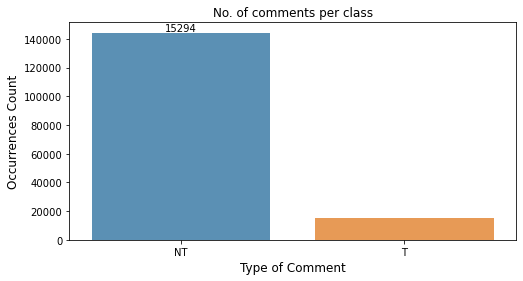

In [28]:
# Define a figure size
pyplotter.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category. 
# alpha = 0.8 to make the bars more translucent
ax = sns.barplot(x=data_count.index, y=[ data_countNT.values[0], data_countT.values[0]], alpha=0.8)

pyplotter.title("No. of comments per class")
pyplotter.ylabel('Occurrences Count', fontsize=12)
pyplotter.xlabel('Type of Comment', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_countT.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

pyplotter.show()

In [36]:
num_rows = len(data)
print(num_rows)

159571


In [37]:
 data[data['class'] == 'T'].shape[0]

15294

## Preprocess the text

In [38]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
words = stopwords.words('english')
#data['comment_text'] = data['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


In [39]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['comment'] = data['comment'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [40]:
##!pip install wordcloud
import sys
print(sys.executable)

import wordcloud
from PIL import Image
from wordcloud import STOPWORDS
from nltk.corpus import stopwords

C:\ProgramData\Anaconda3\python.exe


## Toxic comments are about 10% of the whole training set. This can lead to class imbalance

### We will be taking a subset of the data where the proportion of the toxic comments are at least 20% in relation to non-toxic comments.

In [41]:
data.head(10)

,id,comment,class
0,0000997932d777bf,explanation why the edits made under my userna...,NT
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,NT
2,000113f07ec002fd,hey man i m really not trying to edit war it...,NT
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,NT
4,0001d958c54c6e35,you sir are my hero any chance you remember...,NT
5,00025465d4725e87,congratulations from me as well use the to...,NT
6,0002bcb3da6cb337,cocksucker before you piss around on my work,T
7,00031b1e95af7921,your vandalism to the matt shirvington article...,NT
8,00037261f536c51d,sorry if the word nonsense was offensive to ...,NT
9,00040093b2687caa,alignment on this subject and which are contra...,NT


In [42]:
# shape of toxic domments
toxicData_1 = data[data['class'] == 'T']
toxicData_1.shape

(15294, 3)

In [43]:
toxicData_0 = data[data['class'] == 'NT'].iloc[0:61176,:]

In [44]:
toxicData_done = pd.concat([toxicData_1, toxicData_0], axis=0)
toxicData_done.shape

(76470, 3)

We have 15294 toxic comments and 76470 non toxic comments.

### Import relevant packages for modelling

In [45]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# import decision tree
from sklearn import tree



In [61]:
def df_CreateConfusionMatrix(df_done, label):
    # split the dataset into features (X) and labels (Y)
    X = df_done["comment"]
    y = df_done["class"]

    # vectorize the features using TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(X)

    # split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # train a logistic regression model
    clf = LogisticRegression(solver='lbfgs', max_iter=400)
    clf.fit(X_train, y_train)

    # make predictions on the test set
    y_pred = clf.predict(X_test)

    # generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    pyplotter.xlabel('Prediction')
    pyplotter.ylabel('Actual')
    pyplotter.show()

[[11971   173]
 [  971  2179]]


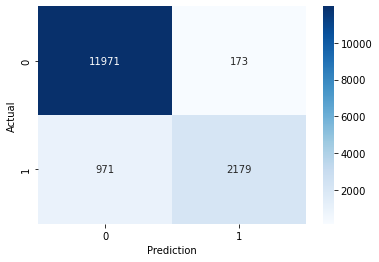

In [62]:
columns_to_change = ['class']
# replace 0 values with 'NT' in the 'column_name' column
toxicData_done[columns_to_change] = toxicData_done[columns_to_change].replace('NT', 0).replace('T', 1)


df_CreateConfusionMatrix(toxicData_done, 'class')

### Create simple function that takes in a dataset and allows user to choose dataset, toxicity label, vectorizer and number of ngrams

In [48]:
def df_TestAndTrain(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment
    y = df_done[label]
    df_CreateConfusionMatrix(df_done, label)
    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    vectorizedObject = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_vectorizedObject = vectorizedObject.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_vectorizedObject  = vectorizedObject.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_vectorizedObject.toarray(), columns=vectorizedObject.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    logisticRegression = LogisticRegression()
    logisticRegression.fit(X_train_vectorizedObject, y_train)
    print('linear regression done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_vectorizedObject, y_train)
    print('kNeighbors classifier done')

    bernouliNB = BernoulliNB()
    bernouliNB.fit(X_train_vectorizedObject, y_train)
    print('Bernoulli Bayes done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_vectorizedObject, y_train)
    print('Multinomial Naive Bayes done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_vectorizedObject, y_train)
    print('LinearSVC done')
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_vectorizedObject, y_train)
    print('random forest done')
    
    decisionTreeClassifier = tree.DecisionTreeClassifier()
    decisionTreeClassifier.fit(X_train_vectorizedObject, y_train)
    print('Decison Tree classifier done')
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(logisticRegression.predict(X_test_vectorizedObject), y_test), 
                                f1_score(knn.predict(X_test_vectorizedObject), y_test), 
                                f1_score(bernouliNB.predict(X_test_vectorizedObject), y_test), 
                                f1_score(mnb.predict(X_test_vectorizedObject), y_test),
                                f1_score(svm_model.predict(X_test_vectorizedObject), y_test), 
                                f1_score(randomforest.predict(X_test_vectorizedObject), y_test),
                                f1_score(decisionTreeClassifier.predict(X_test_vectorizedObject), y_test)
                                ]} 
    print('score data list created')
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest', 'Decision Tree'])  

    return df_f1


### Let's create a TF-IDF vectorizer object for each category and calculate the F1 scores across all models

In [49]:

import time

t0 = time.time()
columns_to_change = ['class']
# replace 0 values with 'NT' in the 'column_name' column
toxicData_done[columns_to_change] = toxicData_done[columns_to_change].replace('NT', 0).replace('T', 1)

df_toxic_comentValues = df_TestAndTrain(toxicData_done, 'class', TfidfVectorizer, (1,1))
df_toxic_comentValues.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_toxic_comentValues


[[12058   185]
 [  955  2096]]
linear regression done
kNeighbors classifier done
Bernoulli Bayes done
Multinomial Naive Bayes done
LinearSVC done
random forest done
Decison Tree classifier done
score data list created
Time taken: 794.0682294368744 seconds


,F1 Score(toxic)
Log Regression,0.783568
KNN,0.294149
BernoulliNB,0.687020
MultinomialNB,0.564519
SVM,0.821718
Random Forest,0.780192
Decision Tree,0.770429


In [95]:
# combining the dataframes into a master dataframe to compare F1 scores across all categories.
#f1_all = pd.concat([df_toxic_comentValues, df_sToxic_comentValues, df_obscene_comentValues, df_insult_comentValues, df_threat_comentValues, df_identityHate_comentValues], axis=1)
#f1_all
df_toxic_comentValues

,F1 Score(toxic)
Log Regression,0.783568
KNN,0.294149
BernoulliNB,0.687020
MultinomialNB,0.564519
SVM,0.821718
Random Forest,0.780192
Decision Tree,0.764486


### Transpose the combined F1 dataframe

In [90]:
df_toxic_comentValues_transposed = df_toxic_comentValues.transpose()
df_toxic_comentValues_transposed


,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest,Decision Tree
F1 Score(toxic),0.783568,0.294149,0.68702,0.564519,0.821718,0.780192,0.764486


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

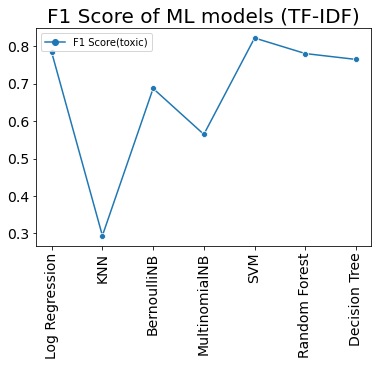

In [92]:
sns.lineplot(data=df_toxic_comentValues, sizes=[20,20], markers=True)
pyplotter.xticks(rotation='90', fontsize=14)
pyplotter.yticks(fontsize=14)
pyplotter.legend(loc='best')
pyplotter.title('F1 Score of ML models (TF-IDF)', fontsize=20)

In [98]:
toxicData_done

,id,comment,class
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
...,...,...,...
67734,b53ae2651dc880c8,about this ip this ip is a school computer s...,0
67735,b53bcff6df9940c1,arbitration enforcement action appeal by su...,0
67736,b53becd09f0df3c6,juden nsaum is a trouble maker and tries to ow...,0
67737,b53c6be1b99421f7,please dont make presonal comments i intend to...,0


LinearSVC and Random Forest models perform best (purple and brown lines seem to be the highest).

### Test if our code actually works. Probability of the comment falling in various categories should be output.

In [99]:
X = toxicData_done.comment
y = toxicData_done['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)



array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
# Sample Prediction
comment1 = ['Bad person you are']
comment2 = ['This is beautiful']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]


array([0.7])

In [101]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.23754772])

So according to Random forest model comment "Bad person you are" has a toxicity score of 0.7 or 70% and "This is beautiful" has a score of 0.23 or 23%. if we set a threshhold of 50% we can say that comment 1 is toxic and comment2 is non toxic.

## Pickling trained RandomForest models for all categories. 

#### We choose Random Forest instead of LinearSVC although the latter performs well, as RDF has predict_proba function and LinearSVC does not. We need to output a probability score for each comment, remember?

In [111]:
import pickle

### We have to pickle not only the TF-IDF vectorizer object, but also the RDF model trained on the related vectorizer.

In [115]:
def dump_model(df, label):
    
    X = df.comment
    y = df[label]

    # Initiate a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)
        

### Create a pickle file for our model

In [116]:
dump_model(toxicData_done, 'class')
    
